In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
#paramaters
#change all units to: force = pN, length = nm, time = ms
pars = {}
pars['a00'] = -21*10**-3
pars['a01'] = 0
pars['a10'] = 0
pars['a11'] = -1
pars['gamma0'] = 8.72
pars['gamma1'] = 54.8

pars['kbT'] = 4.1
pars['noise0'] = 2*pars['gamma0']*pars['kbT']
pars['noise1'] = 4.916*(1e3)

pars['delta_t'] = 0.01

In [3]:
def analytical_soln_acf_generic(omega_list, pars):

    autocorr_list = []
    for omega in omega_list:
        numerator = ( pars['a11']**2 * pars['noise0'] ) \
        + ( pars['a01']**2 * pars['noise1'] ) \
        + ( (omega**2) * (pars['gamma1']**2) * (pars['noise0']) )

        denominator = ( -2*pars['a11']*pars['a00']*pars['a10']*pars['a01'] ) \
        + ( (omega**2) * (pars['gamma0']**2) * (pars['a11']**2) ) \
        + ( ( (pars['a10']*pars['a01']) + (pars['gamma0']*pars['gamma1']* (omega**2) ) )**2) \
        + ( (pars['a00']**2) * ( (pars['a11']**2) + (omega**2) * (pars['gamma1']**2) ) )

        autocorr = numerator/denominator
        autocorr_list.append(autocorr)
    return autocorr_list

In [4]:
def analytical_soln_imaginary_response(omega_list, pars):
    im_response_list = []
    for omega in omega_list:
        numerator = omega*(
            (pars['gamma1']*pars['a10']*pars['a01']) \
            + (pars['gamma0']*(pars['gamma1']**2)*(omega**2)) \
            + ((pars['a11']**2)*pars['gamma0'])
        )
        
        denominator = ( -2*pars['a11']*pars['a00']*pars['a10']*pars['a01'] ) \
        + ( (omega**2) * (pars['gamma0']**2) * (pars['a11']**2) ) \
        + ( ( (pars['a10']*pars['a01']) + (pars['gamma0']*pars['gamma1']* (omega**2) ) )**2) \
        + ( (pars['a00']**2) * ( (pars['a11']**2) + (omega**2) * (pars['gamma1']**2) ) )

        
        im_response = numerator/denominator
        im_response_list.append(im_response)
    return im_response_list

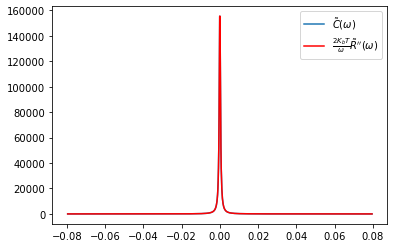

energy_dissipated 2.0112170846601633e-16


In [6]:
omega_list = np.linspace(-0.5, 0.5, 1000)
paper_acf_soln = analytical_soln_acf_generic(omega_list, pars)
paper_imaginary_soln = analytical_soln_imaginary_response(omega_list, pars)
final_imaginary = (np.array(2*pars['kbT'])*np.array(paper_imaginary_soln))/(omega_list)

plt.plot(omega_list/(2*np.pi), np.array(paper_acf_soln), label='$\~{C} (\omega)$')
plt.plot(omega_list/(2*np.pi), np.array(final_imaginary), color='red', label="$\\frac{2K_bT}{\omega} \~{R}'' (\omega)$")
plt.legend()
plt.show()

delta_omega = omega_list[1] - omega_list[0]
omega_squared = (omega_list)**2

#paper_acf_soln is autocrrelation function
#final_imaginary is imaginary of response function * (2*kBT/omega)
violation_function = (pars['gamma0']/(2*np.pi))*(omega_squared*paper_acf_soln - omega_squared*final_imaginary)
#energy dissipated is the integral of the violation_function
energy_diss = np.sum(violation_function*delta_omega)
print('energy_dissipated', energy_diss)

Plotter

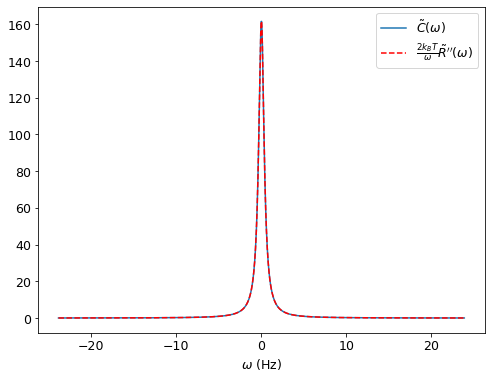

In [7]:
fig = plt.figure(figsize=(8,6))
omega_list_plotter = np.linspace(-150, 150, 1000)
paper_acf_soln = analytical_soln_acf_generic(omega_list_plotter/(1e3), pars)
paper_imaginary_soln = analytical_soln_imaginary_response(omega_list_plotter/(1e3), pars)
final_imaginary = (np.array(2*pars['kbT'])*np.array(paper_imaginary_soln))/(omega_list_plotter/(1e3))

plt.plot(omega_list_plotter/(2*np.pi), np.array(paper_acf_soln)/(1e3), label='$\~{C} (\omega)$')
plt.plot(omega_list_plotter/(2*np.pi), np.array(final_imaginary)/(1e3), ls='dashed', color='red', label="$\\frac{2k_BT}{\omega} \~{R}'' (\omega)$")

plt.xlabel('$\omega$ (Hz)', fontsize=12.5)
# plt.ylabel('$\~{C}$ ($nm^2$ $s$)', fontsize=12.5)
plt.xticks(fontsize=12.5)
plt.yticks(fontsize=12.5)
plt.legend(prop={'size': 12.5})
plt.savefig('dissipation_lorentzian.png', dpi=300)
plt.show()

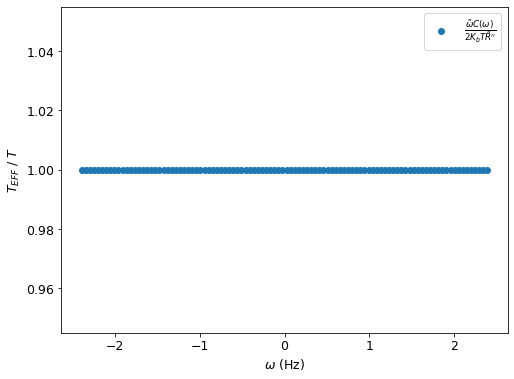

In [8]:
fig = plt.figure(figsize=(8,6))
omega_list = np.linspace(-15, 15, 100)
nocoupling_acf_soln = analytical_soln_acf_generic(omega_list/(1e3), pars)
nocoupling_imaginary_soln = analytical_soln_imaginary_response(omega_list/(1e3), pars)
final_imaginary_nocoupling = (np.array(2*pars['kbT'])*np.array(nocoupling_imaginary_soln))/(omega_list/(1e3))

plt.scatter(omega_list/(2*np.pi), nocoupling_acf_soln/final_imaginary_nocoupling, label="$\\frac{\~ \omega {C} (\omega)}{2K_bT \~{R}''}$")
plt.xlabel('$\omega$ (Hz)', fontsize=12.5)
plt.ylabel('$T_{EFF}$ / $T$', fontsize=12.5)
plt.xticks(fontsize=12.5)
plt.yticks(fontsize=12.5)
plt.legend(prop={'size': 12.5})
plt.savefig('teff_lorentzian.png', dpi=300)
plt.show()